In [4]:
import torch 
from metrics import AlignmentMetrics

import pickle
import numpy as np
import matplotlib.pyplot as plt

Please install the pymp library using `pip install pymp` to speed up non-batched metrics


In [15]:
path = '../representation_analysis/coding.pt'
#path = '../representation_analysis/math_coding2.pt'
#path = '../representation_analysis/bio_qa.pt'
data_kernel = torch.load(path)

path = '../interpolation_results/coding.pkl'
#path = '../interpolation_results/math_coding2.pkl'
#path = '../interpolation_results/bio_qa.pkl'
with open(path, 'rb') as f:
    data_loss = pickle.load(f)

# indomain coding
# base_paths = ['/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-tinycodes-gpt2-0.0008-1-tinycodes_560000_step-',
#               '/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-code_instructions-gpt2-0.0008-1-code_instructions_560000_step-']

# math coding 
# base_paths = ['/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-combined_coder_python-gpt2-0.0008-1-combined_coder_python_560000_step-',
#               '/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-orca-math-gpt2-0.0008-1-orca-math-problems_560000_step-']

# bio qa
base_paths = ['/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-rag-bio-text-gpt2-0.0008-1-rag-bio-text_560000_step-',
              '/data/scratch-oc40/pulkitag/jyop/gpt-merge-out/gpt2-med-qa-gpt2-0.0008-1-med-qa_560000_step-']


max_step = 8500
step_size = 500

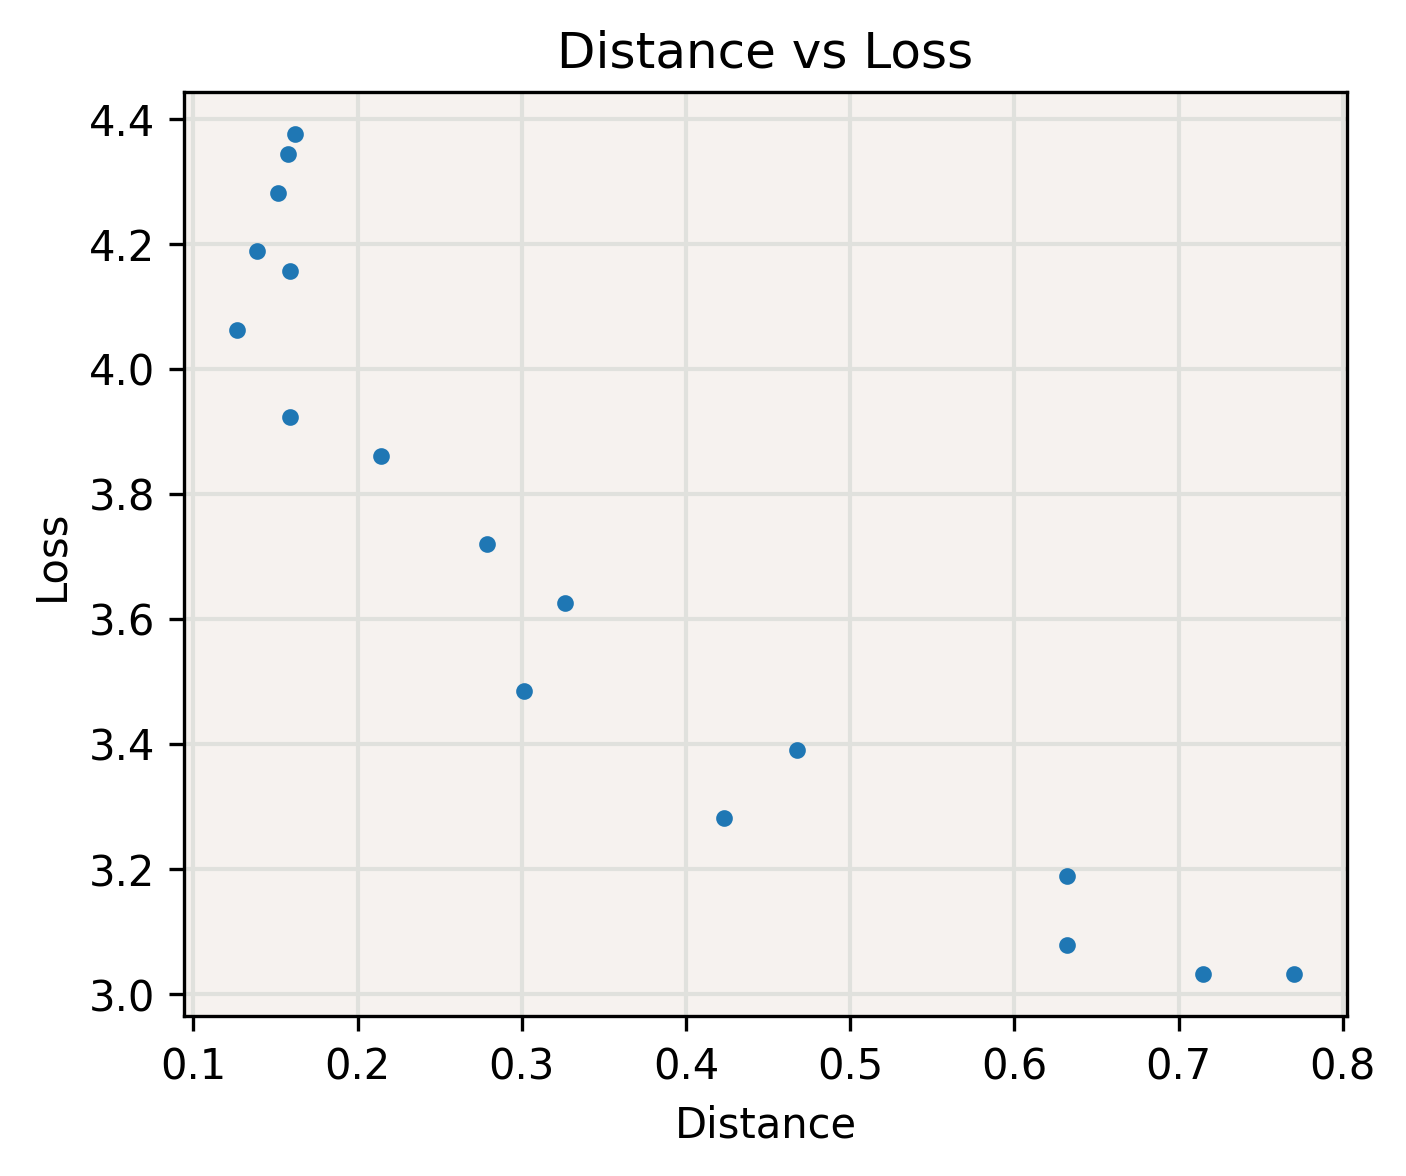

In [16]:

loss_vals = []
for i, (key, values) in enumerate(data_loss.items()):
    y = min(list(values.values()))
    loss_vals.append(y)

dist_vals = []
for step in range(0, max_step+1, step_size):
    representation_1 = data_kernel[base_paths[0] + str(step) + '_finetuned.pt']
    representation_2 = data_kernel[base_paths[1] + str(step) + '_finetuned.pt']
    dist_vals.append(AlignmentMetrics.cka(representation_1, representation_2))

# remove the first value
loss_vals = loss_vals[1:]
dist_vals = dist_vals[1:]

fig, ax = plt.subplots(figsize=(5, 4), dpi=300)

ax.set_facecolor('#f6f2ef')
plt.grid(color='#e0e1dd', linestyle='-', linewidth=1)
plt.plot(dist_vals, loss_vals, 'o', markersize=3)
plt.xlabel('Distance')
plt.ylabel('Loss')
plt.title('Distance vs Loss')
plt.show()

In [31]:
loss_vals

[2.015625,
 1.578125,
 1.5625,
 1.5546875,
 1.5703125,
 1.5703125,
 1.5703125,
 1.59375,
 1.5703125,
 1.6171875,
 1.6015625,
 1.625,
 1.625,
 1.6328125,
 1.6484375,
 1.625,
 1.65625,
 1.640625]

In [32]:
dist_vals

[1.0,
 0.48227202892303467,
 0.7603790760040283,
 0.5200318098068237,
 0.5745813250541687,
 0.6079587340354919,
 0.539372980594635,
 0.591030478477478,
 0.6379435062408447,
 0.6327264308929443,
 0.5466669201850891,
 0.602850615978241,
 0.510712206363678,
 0.5567349791526794,
 0.4489116370677948,
 0.48110705614089966,
 0.5362187623977661,
 0.5074059367179871]